# What can we learn about people who voted for Hillary Clinton and Donald Trump from Electorate Data?

## YouGov Data

YouGov and Democracy Fund teamed up to produce the Voter Study Group data set, a longitudinal poll of 8000 individuals initially interviewed in 2012, with a follow-up poll in 2016.

## Voter module

The `Voter` module is a python module created to easily work with and analyze the YouGov data.

It is a class initialized with the call `Voter()`. If initialized on its own, it loads the entire YouGov data set as a pandas data frame that can be accessed and tinkered with `Voter().data` as you would a normal `pandas` data frame. 

All of the information necessary to work with the data set is in the dictionary `polls` in the file `poll.py`

The main functions for working with the class are `get_voters()`, `get_column()` and `plot_percentages()`

`get_column()` accesses a particular column in the data frame, and resets the object's data frame to consist of only that column. The columns are indexed by the dataset's column labels. The sole argument for this function is `column_label="<column_label>"`.

`get_voters()` is more complex. It takes in a column label and a selection. One you know what column you want to work with, you can find the response indicators with `polls[<column_lable>]`, which will output all the information for that question. Once you know what indicator you would like to sort by, you can access the voters who match that indicator, in that column, by calling `<voter_object>.get_voters(column_label="<column_label">, selection=<identifier>)`. This function outputs a new `Voter` instance, with `<instance>.data` set a data frame with all columns, but consisting of only voters that matched the identifier in the column you specified.

`plot_percentages()` takes a column as input, and plots the percentages for each response indicator, indexed by the response, as a bar chart, for the `Voter()` instance. It has a few other odds and ends as well:

`rotate_labels` can be set to `True` or `False` depending on if you want the index labels rotated or not. (default is `False`)
`weighted` can be set to `True` if you'd like to weight the response indicators by demographic scaling weights. (default is `False`)
`bar_labels` can be set to `True` or `False` depending on whether or not you want the bars in the bar chart to be labeled with their exact percentages. (default is `True`)
`ft` can be set to `True` if you are plotting "Feeling Thermometer" data (default is `False`)
`not_sure` can be set to `True` if you'd like to show the percentages of people who answered "Not Sure" for each question. (default is `True`)

In [1]:
from polls import polls
from Voters import *

Here's a list of the available questions, and their column labels

In [2]:
keys = polls.keys()
print("###COLUMNS###")
for key in keys:
    print(polls[key][0] + '  --  ' + key)

###COLUMNS###
Interest in news and public affairs  --  newsint2_baseline
Political Interest  --  newsint_2016
Direction of the country  --  track_baseline
Direction of the country (2016)  --  track_2016
Life Better or Worse  --  americatrend_2016
Distribution of money and wealth in this country  --  wealth_2016
In America, values and culture of people like R are...  --  values_culture_2016
Trust government to do what's right  --  trustgovt_baseline
Trust government to do what's right (2016)  --  trustgovt_2016
Most people can/can't be trusted  --  trust_people_2016
People try to be helpful or are they mostly just looking out for themselves  --  helpful_people_2016
Barack Obama Approval  --  obamaapp_baseline
Barack Obama Approval (2016)  --  obamaapp_2016
Hours watch TV daily  --  watchtv_baseline
Ideology  --  ideo5_baseline
Issue Importance: Iraq War  --  imiss_a_baseline
Issue Importance: The Economy  --  imiss_b_baseline
Issue Importance: Immigration  --  imiss_c_baseline
Issue Imp

Let's start trying to investigate what the US electorate thinks about Hillary Clinton

In [3]:
all_voters = Voters()
presvote = all_voters.get_voters(column_label="turnout16_2016", selection=1).get_column(column_label="presvote16post_2016")

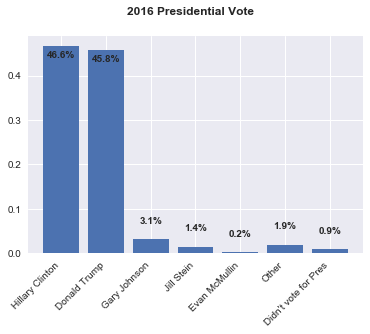

N = 7611
NaNs (percentage): [0.00021615]


In [4]:
presvote.plot_percentages(rotate_labels=True, weighted=True)

So, what can we say about the data so far? Donald Trump's percentage is too low by are off by 1.1%, and Hillary's percentages are too low by about 1.58%. All other candidates are off by <1%.

## Favorability for each set of voters

### Hillary Voters

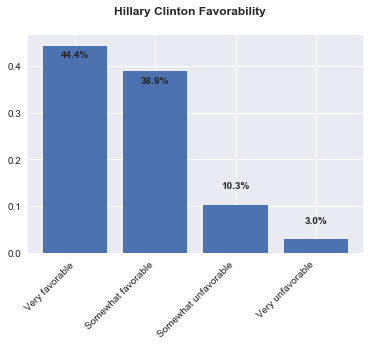

N = 3545
NaNs (percentage): [0.00932625]


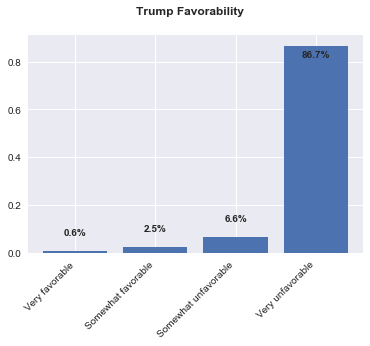

N = 3545
NaNs (percentage): [0.00976438]


In [5]:
H_voters = all_voters.get_voters(column_label="turnout16_2016", selection=1).get_voters(column_label="presvote16post_2016", selection=1)
H_voters.plot_percentages(selection="fav_hrc_2016", rotate_labels=True)
H_voters.plot_percentages(selection="fav_trump_2016", rotate_labels=True)

### Trump Voters

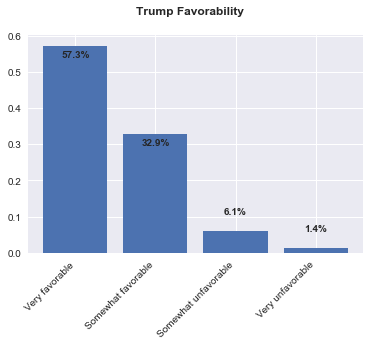

N = 3479
NaNs (percentage): [0.00689114]


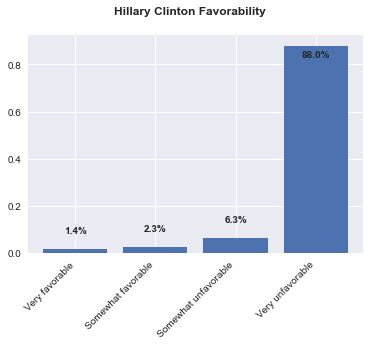

N = 3479
NaNs (percentage): [0.01314307]


In [6]:
T_voters = all_voters.get_voters(column_label="turnout16_2016", selection=1).get_voters(column_label="presvote16post_2016", selection=2)
T_voters.plot_percentages(selection="fav_trump_2016", rotate_labels=True)
T_voters.plot_percentages(selection="fav_hrc_2016", rotate_labels=True)

## Education levels

### Hillary voters

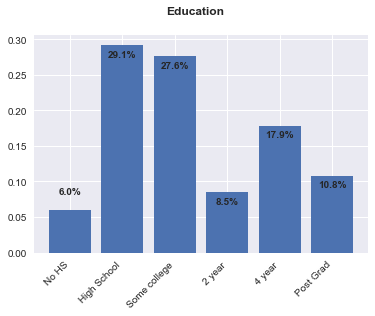

N = 3545
NaNs (percentage): [0.00051102]


In [7]:
H_voters.plot_percentages(selection="educ_baseline", rotate_labels=True)

### Trump voters

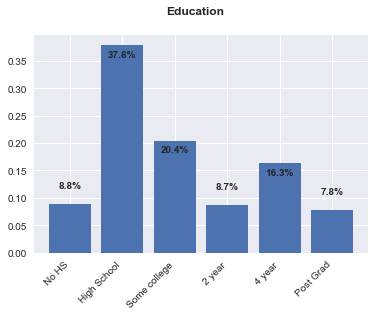

N = 3479
NaNs (percentage): [0.00198716]


In [8]:
T_voters.plot_percentages(selection="educ_baseline", rotate_labels=True)

## Race

### Hillary Voters

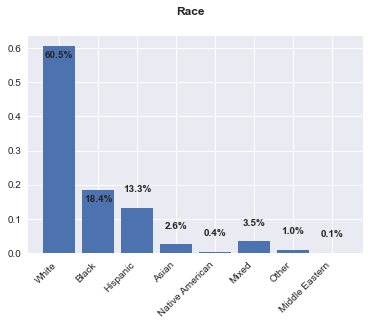

N = 3545
NaNs (percentage): [0.00099224]


In [9]:
H_voters.plot_percentages(selection="race_baseline")

### Trump voters

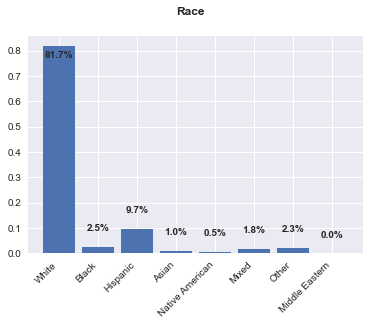

N = 3479
NaNs (percentage): [0.00383334]


In [10]:
T_voters.plot_percentages(selection="race_baseline")

## Employment Status

### Hillary Voters

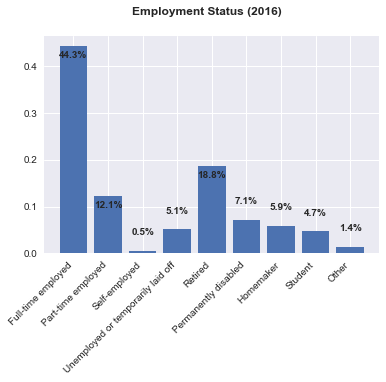

N = 3545
NaNs (percentage): [0.00012409]


In [11]:
H_voters.plot_percentages(selection="employ_2016")

### Trump Voters

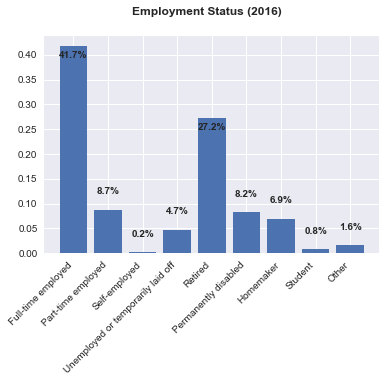

N = 3479


In [12]:
T_voters.plot_percentages(selection="employ_2016")

## Family Income

### Hillary voters

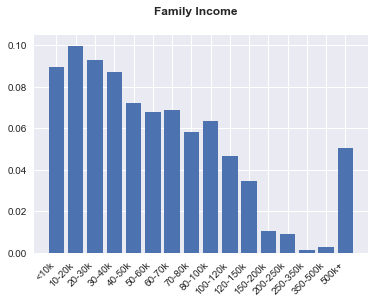

N = 3545
NaNs (percentage): [0.00354795]


In [13]:
H_voters.plot_percentages(selection="faminc_2016", bar_labels=False)

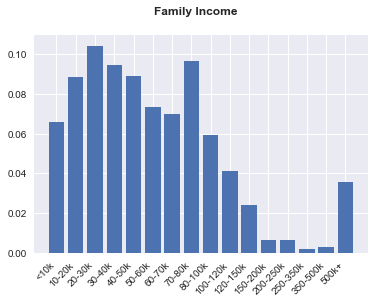

N = 3479
NaNs (percentage): [0.00237617]


In [14]:
T_voters.plot_percentages(selection="faminc_2016", bar_labels=False)

## Gender

### Hillary Voters

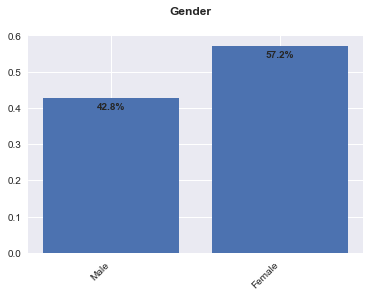

N = 3545


In [15]:
H_voters.plot_percentages(selection="gender_baseline")

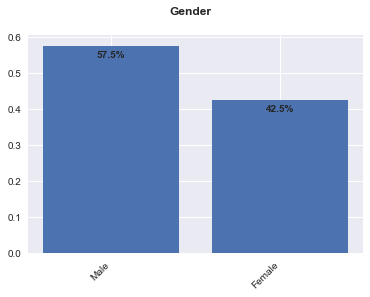

N = 3479


In [16]:
T_voters.plot_percentages(selection="gender_baseline")

## Religion

### Hillary voters

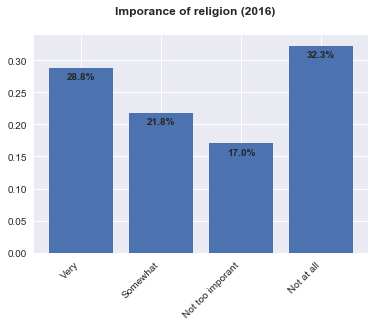

N = 3545


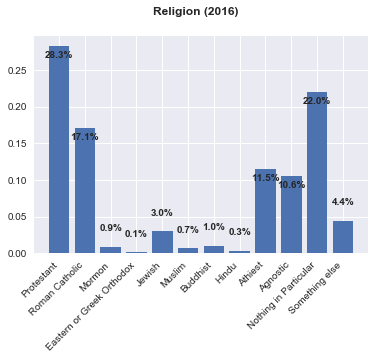

N = 3545
NaNs (percentage): [0.00121851]


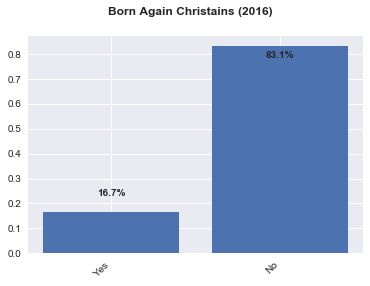

N = 3545
NaNs (percentage): [0.00158171]


In [17]:
H_voters.plot_percentages(selection="pew_religimp_2016")
H_voters.plot_percentages(selection="religpew_2016")
H_voters.plot_percentages(selection="pew_bornagain_2016")

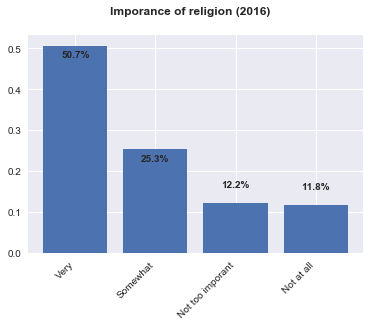

N = 3479


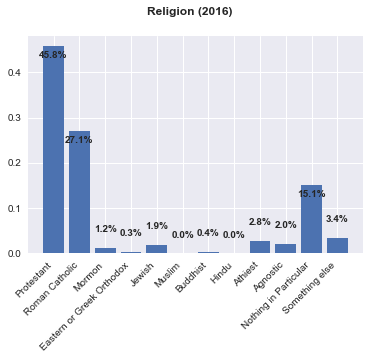

N = 3479
NaNs (percentage): [0.00056223]


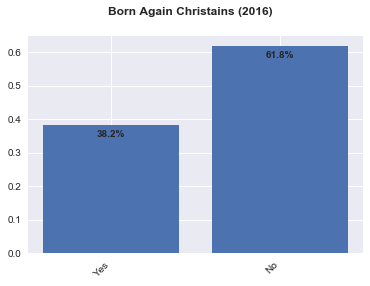

N = 3479
NaNs (percentage): [0.00033415]


In [18]:
T_voters.plot_percentages(selection="pew_religimp_2016")
T_voters.plot_percentages(selection="religpew_2016")
T_voters.plot_percentages(selection="pew_bornagain_2016")

## 2012 vote / Obama Favorability / Job approval

### Hillary voters

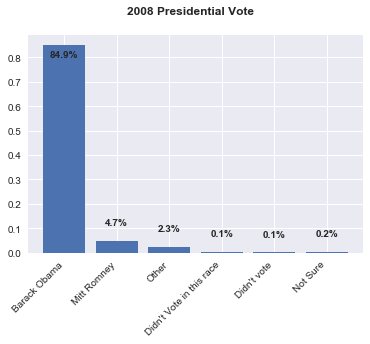

N = 3545
NaNs (percentage): [0.07765823]


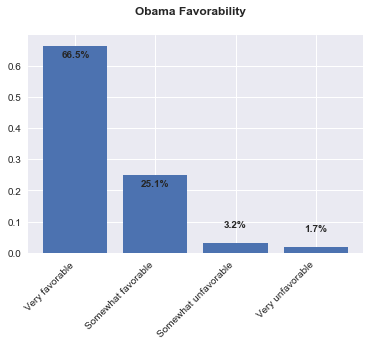

N = 3545
NaNs (percentage): [0.01051801]


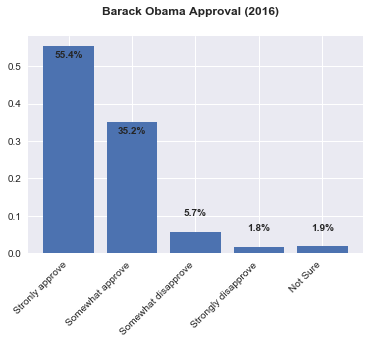

N = 3545
NaNs (percentage): [0.0001151]


In [22]:
H_voters.plot_percentages(selection="post_presvote12_2012")
H_voters.plot_percentages(selection="fav_obama_2016")
H_voters.plot_percentages(selection="obamaapp_2016")

### Trump Voters

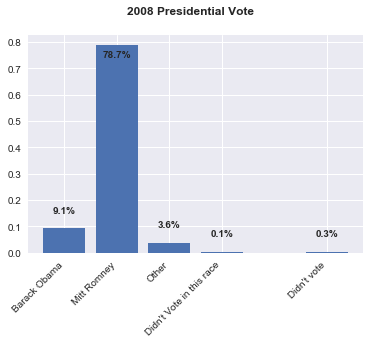

N = 3479
NaNs (percentage): [0.08275642]


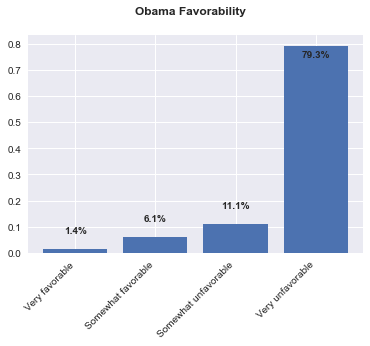

N = 3479
NaNs (percentage): [0.0073008]


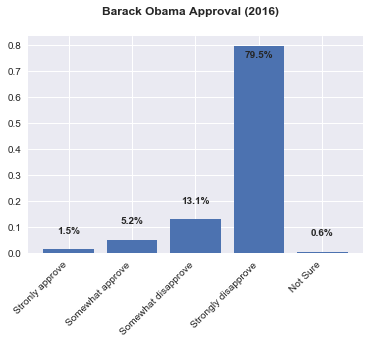

N = 3479
NaNs (percentage): [0.00145043]


In [23]:
T_voters.plot_percentages(selection="post_presvote12_2012")
T_voters.plot_percentages(selection="fav_obama_2016")
T_voters.plot_percentages(selection="obamaapp_2016")

## Economic Outlook/Direction of the Country

### Hillary voters

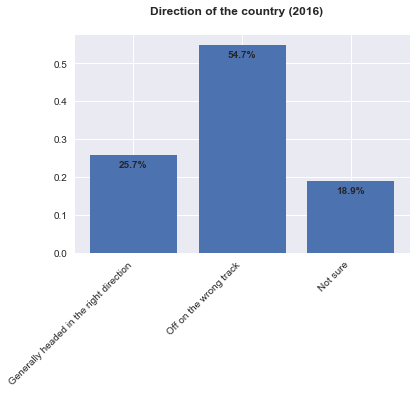

N = 3545
NaNs (percentage): [0.00761753]


In [24]:
H_voters.plot_percentages(selection="track_2016")

### Trump voters

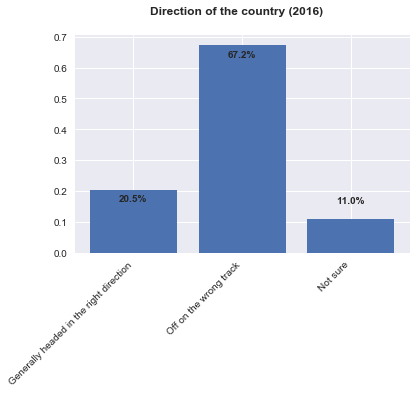

N = 3479
NaNs (percentage): [0.01410449]


In [25]:
T_voters.plot_percentages(selection="track_2016")

## Trust in Gov

### Hillary voters

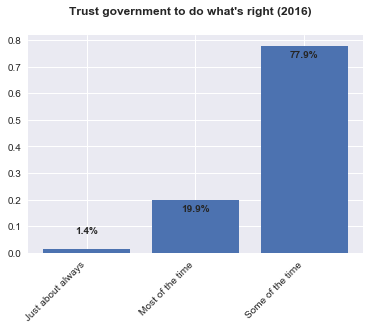

N = 3545
NaNs (percentage): [0.00788365]


In [27]:
H_voters.plot_percentages(selection="trustgovt_2016")

### Trump voters

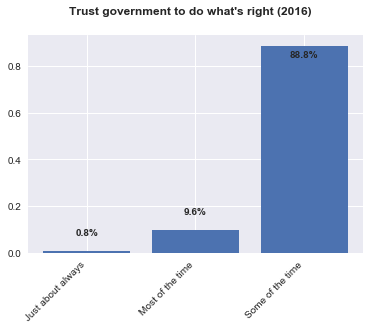

N = 3479
NaNs (percentage): [0.00755202]


In [29]:
T_voters.plot_percentages(selection="trustgovt_2016")

## Values/Culture

### Hillary voters

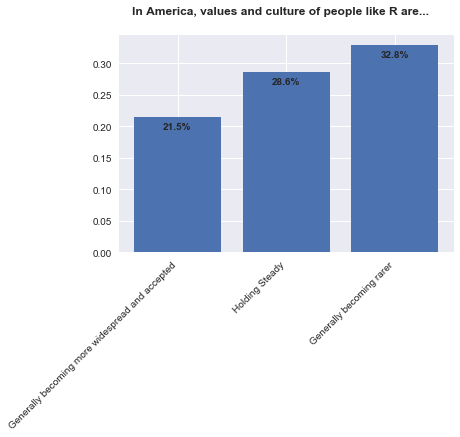

N = 3545
NaNs (percentage): [0.00487351]


In [30]:
H_voters.plot_percentages(selection="values_culture_2016")

### Trump voters

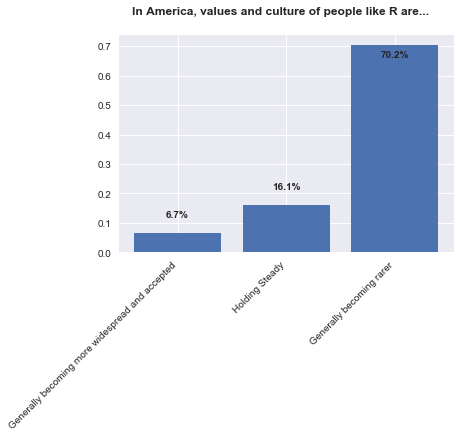

N = 3479
NaNs (percentage): [0.00358229]


In [31]:
T_voters.plot_percentages(selection="values_culture_2016")

## Trust People


### Hillary voters

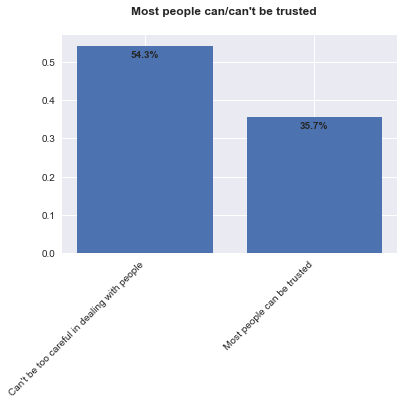

N = 3545
NaNs (percentage): [0.01104254]


In [32]:
H_voters.plot_percentages(selection="trust_people_2016")

### Trump voters

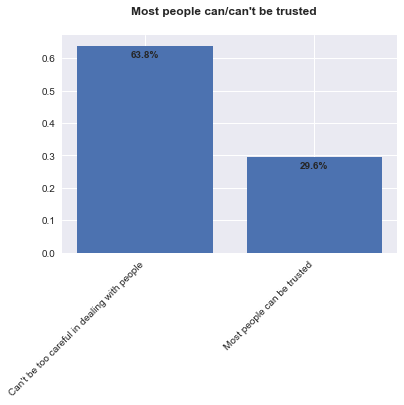

N = 3479
NaNs (percentage): [0.00545212]


In [33]:
T_voters.plot_percentages(selection="trust_people_2016")

## Hours TV Watched

### Hillary voters

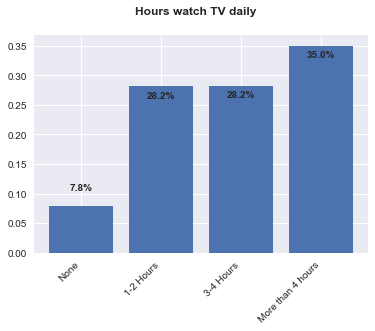

N = 3545
NaNs (percentage): [0.00732925]


In [35]:
H_voters.plot_percentages(selection="watchtv_baseline")

### Trump voters

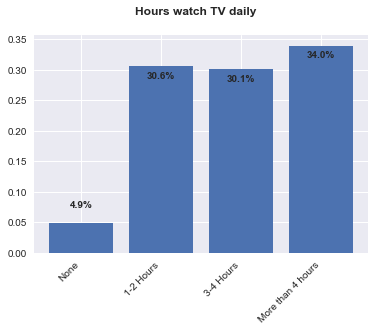

N = 3479
NaNs (percentage): [0.00496848]


In [37]:
T_voters.plot_percentages(selection="watchtv_baseline")

## Most Important Issue

### Hillary voters

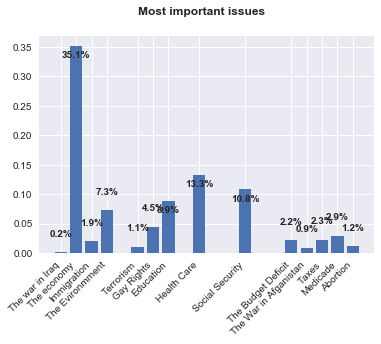

N = 3545
NaNs (percentage): [0.07397704]


In [38]:
H_voters.plot_percentages(selection="imissf_baseline")

### Trump voters

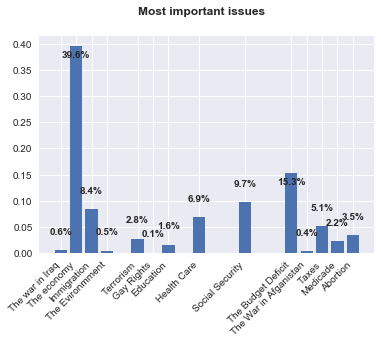

N = 3479
NaNs (percentage): [0.03454196]


In [39]:
T_voters.plot_percentages(selection="imissf_baseline")

## Immigration

### Hillary voters

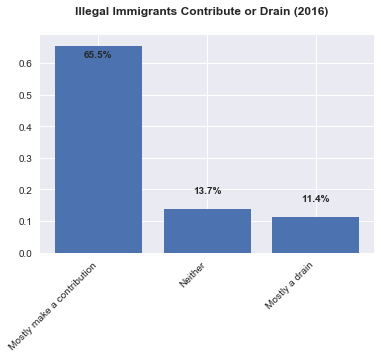

N = 3545
NaNs (percentage): [0.00538847]


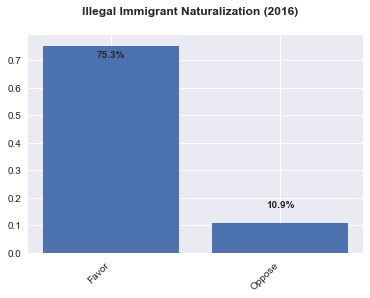

N = 3545
NaNs (percentage): [0.00537525]


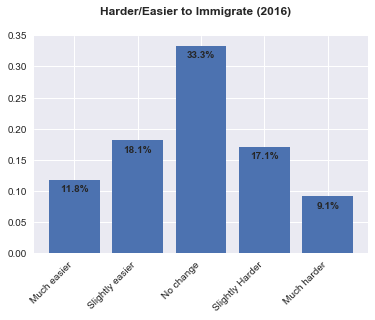

N = 3545
NaNs (percentage): [0.00687009]


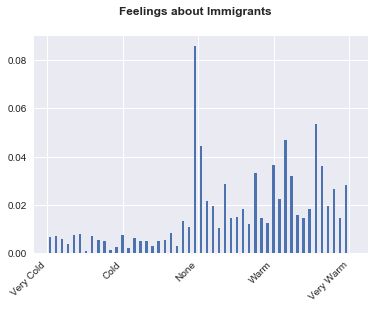

N = 3545
NaNs (percentage): [0.02100963]


In [44]:
H_voters.plot_percentages(selection="immi_contribution_2016")
H_voters.plot_percentages(selection="immi_naturalize_2016")
H_voters.plot_percentages(selection="immi_makedifficult_2016")
H_voters.plot_percentages(selection="ft_immig_2016", bar_labels=False, ft=True)

### Trump voters

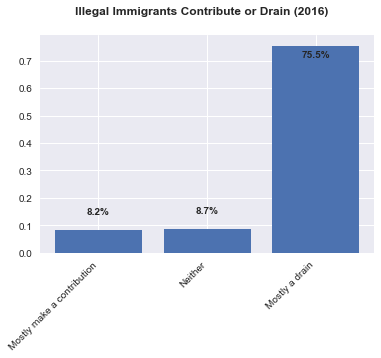

N = 3479
NaNs (percentage): [0.00264405]


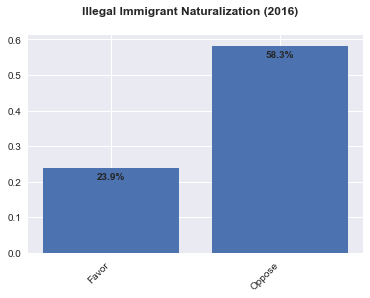

N = 3479
NaNs (percentage): [0.00482958]


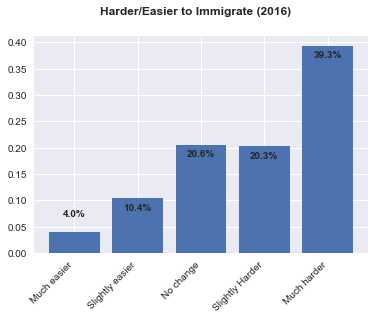

N = 3479
NaNs (percentage): [0.00201975]


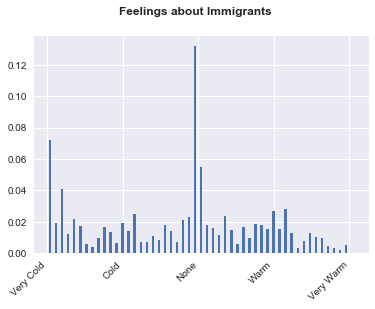

N = 3479
NaNs (percentage): [0.02566398]


In [45]:
T_voters.plot_percentages(selection="immi_contribution_2016")
T_voters.plot_percentages(selection="immi_naturalize_2016")
T_voters.plot_percentages(selection="immi_makedifficult_2016")
T_voters.plot_percentages(selection="ft_immig_2016", bar_labels=False, ft=True)

## Abortion/Gay Marriage

### Hillary voters

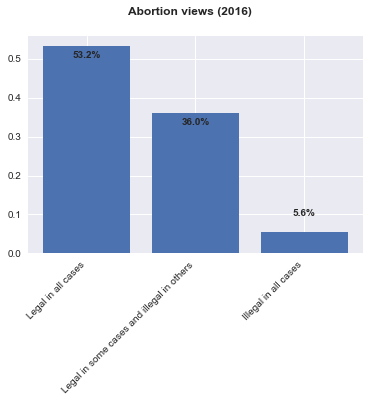

N = 3545
NaNs (percentage): [0.00359627]


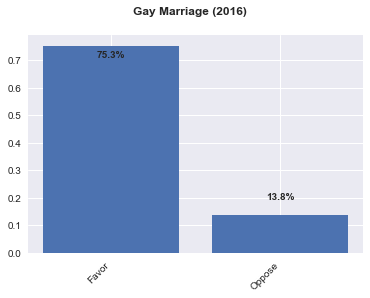

N = 3545
NaNs (percentage): [0.00066381]


In [46]:
H_voters.plot_percentages(selection="abortview3_2016")
H_voters.plot_percentages(selection="gaymar_2016")

### Trump voters

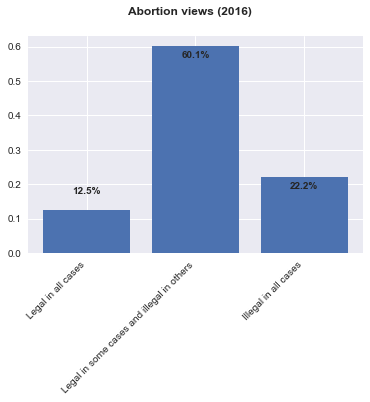

N = 3479
NaNs (percentage): [0.00356429]


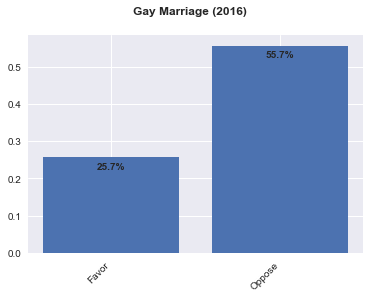

N = 3479
NaNs (percentage): [0.00294727]


In [47]:
T_voters.plot_percentages(selection="abortview3_2016")
T_voters.plot_percentages(selection="gaymar_2016")

## Increase Taxes on Wealthy

### Hillary voters

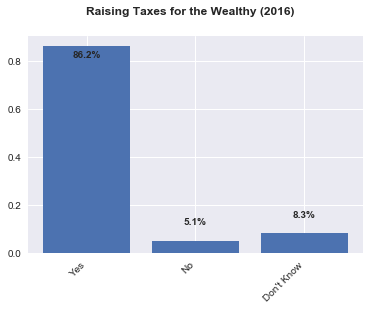

N = 3545
NaNs (percentage): [0.00376466]


In [48]:
H_voters.plot_percentages(selection="taxdoug_2016")

### Trump voters

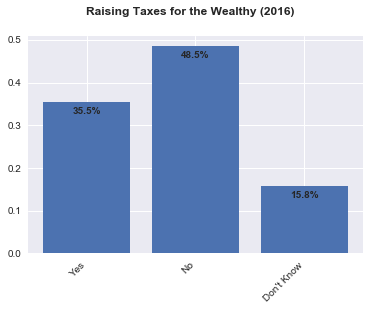

N = 3479
NaNs (percentage): [0.00257984]


In [49]:
T_voters.plot_percentages(selection="taxdoug_2016")

## Universal Health Coverage

### Trump voters

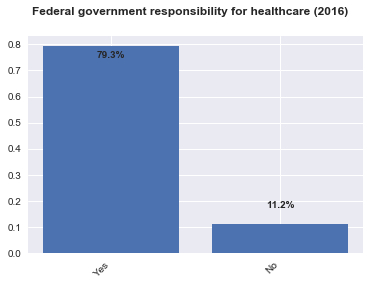

N = 3545
NaNs (percentage): [0.00630024]


In [50]:
H_voters.plot_percentages(selection="univhealthcov_2016")

### Trump voters

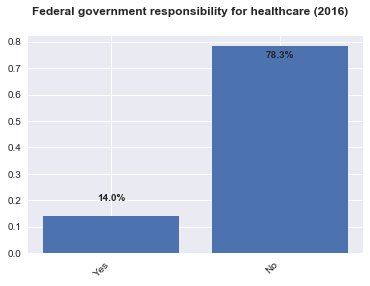

N = 3479
NaNs (percentage): [0.00347236]


In [51]:
T_voters.plot_percentages(selection="univhealthcov_2016")

## Global Warming

### Trump voters

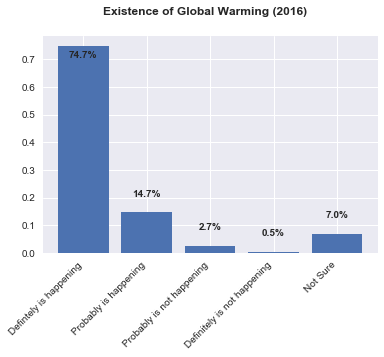

N = 3545
NaNs (percentage): [0.00422419]


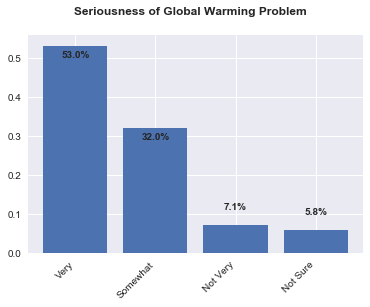

N = 3545
NaNs (percentage): [0.02119614]


In [53]:
H_voters.plot_percentages(selection="envwarm_2016")
H_voters.plot_percentages(selection="envser2_baseline")

### Trump voters

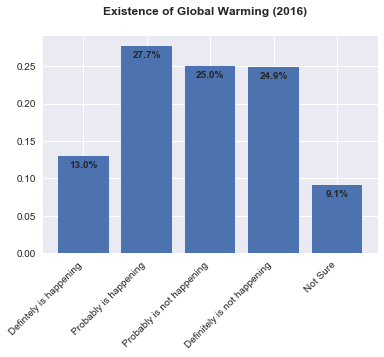

N = 3479
NaNs (percentage): [0.00204431]


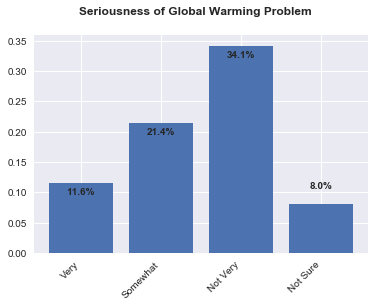

N = 3479
NaNs (percentage): [0.2488217]


In [54]:
T_voters.plot_percentages(selection="envwarm_2016")
T_voters.plot_percentages(selection="envser2_baseline")

## Trade Policy

### Hillary voters

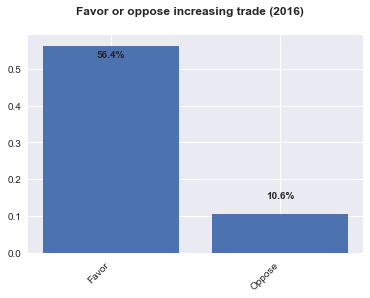

N = 3545
NaNs (percentage): [0.00944954]


In [55]:
H_voters.plot_percentages(selection="tradepolicy_2016")

### Trump voters

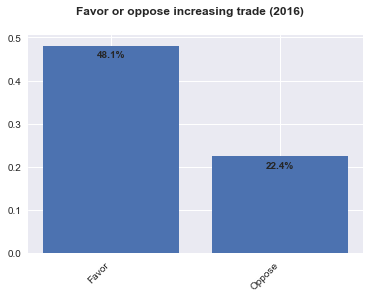

N = 3479
NaNs (percentage): [0.00532472]


In [56]:
T_voters.plot_percentages(selection="tradepolicy_2016")

## Ideology


### Hillary voters

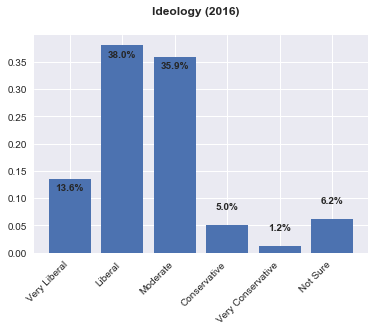

N = 3545
NaNs (percentage): [0.00129397]


In [57]:
H_voters.plot_percentages(selection="ideo5_2016")

### Trump voters

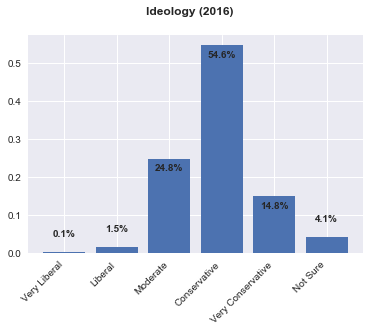

N = 3479
NaNs (percentage): [0.00021255]


In [58]:
T_voters.plot_percentages(selection="ideo5_2016")

## Feelings Thermometers

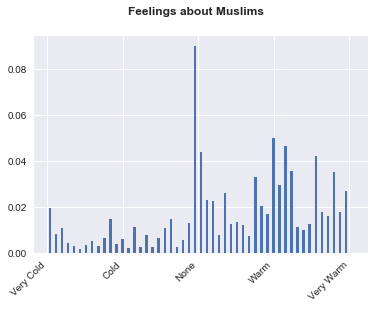

N = 3545
NaNs (percentage): [0.01597032]


In [19]:
H_voters.plot_percentages(selection="ft_muslim_2016", bar_labels=False, ft=True)

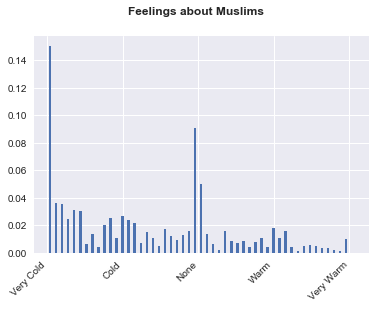

N = 3479
NaNs (percentage): [0.06078407]


In [20]:
T_voters.plot_percentages(selection="ft_muslim_2016", bar_labels=False, ft=True)

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100.])